In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [26]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [32]:
tf.test.is_built_with_cuda()

True

In [33]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [34]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape


In [35]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

In [37]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

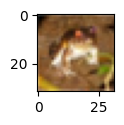

In [38]:
plot_sample(0)

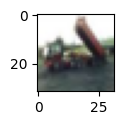

In [39]:
plot_sample(2)

In [40]:
y_train[2]

array([9], dtype=uint8)

In [41]:
classes[y_train[2][0]]

'truck'

### scaling the images

#### normalising the values to make it work for deep learning

In [42]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [43]:
x_train_scaled.shape

(50000, 32, 32, 3)

#### Applying one hot encoding because deep learning models does not work with categorical data

In [44]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### There are 10 classes in cifar 10

In [45]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

#### look at the y_train cell. you can see the values printed here changed to 0 and 1

In [46]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### model building. Flatten the data so that the model can read

#### flattening is used to convert multidimensional array into one dimension

In [47]:
32*32*3

3072

In [20]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    # creating hidden layer somewhat equal to the input
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    # 10 neurons because of 10 classes in cifar 10
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8167 - accuracy: 0.3548
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6263 - accuracy: 0.4267
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5430 - accuracy: 0.4550
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4836 - accuracy: 0.4764
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4349 - accuracy: 0.4953
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3887 - accuracy: 0.5118
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3544 - accuracy: 0.5237
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3190 - accuracy: 0.5384
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2830 - accuracy: 0.5486
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.25

In [21]:
# prompt:

model.evaluate(x_test_scaled,y_test_categorical)


313/313 [==============================] - 1s 3ms/step - loss: 1.5309 - accuracy: 0.5666


[1.5309354066848755, 0.5666000247001648]

In [48]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [50]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 145s 92ms/step - loss: 1.8105 - accuracy: 0.3561
3min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [52]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8116 - accuracy: 0.3535
12.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
